In [136]:
# Update sklearn
#!pip install sklearn --upgrade
# Install joblib
#!pip install joblib

In [137]:
# Import dependencies
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [138]:
# Load in exoplanet data
planets_df = pd.read_csv("resources/exoplanet_data.csv")
planets_df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [139]:
# Show all columns
planets_df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [140]:
# # Drop unneccessary columns
# planets_df = planets_df[['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
#         'koi_fpflag_ec', 'koi_period','koi_time0bk', 'koi_impact','koi_duration', 'koi_depth', 
#         'koi_prad','koi_teq', 'koi_insol','koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 
#         'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag']]


In [141]:
# Drop null columns & rows
planets_df = planets_df.dropna(axis='columns', how='all')
planets_df = planets_df.dropna(how="any")
planets_df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


## Select Features

In [142]:
# X = planets_df.drop("koi_disposition", axis=1)
X = planets_df[['koi_fpflag_co', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_model_snr', 'koi_prad']]
y = planets_df["koi_disposition"]
print(X.shape, y.shape)

(6991, 5) (6991,)


## Train, Test, Split

In [143]:
# Separate the data into training & testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [144]:
# Show rows for training
X_train

,koi_fpflag_co,koi_fpflag_nt,koi_fpflag_ss,koi_model_snr,koi_prad
6122,0,0,0,10.8,1.24
6370,0,0,1,13.8,0.86
2879,0,1,0,254.3,3.21
107,0,0,0,38.4,2.25
29,0,0,0,696.5,12.21
...,...,...,...,...,...
3772,0,0,1,1320.5,50.31
5191,0,0,0,13.4,1.97
5226,0,0,1,471.0,100.03
5390,0,1,0,79.5,64.00


## Pre-Processing

In [145]:
# MinMaxScaler: scale the numerical data
# Define the scaler
X_scaler = MinMaxScaler().fit(X_train)

# Transform x train & test (with scaler)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [146]:
# Encode labels for KOI disposition
label_encoder = LabelEncoder()

# Train the encoder
label_encoder.fit(y_train)

encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [147]:
# One hot encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [148]:
# Feature selection & remove unnecessary features


### Decision Tree:

In [151]:
from sklearn import tree
# Decision Tree Classifier
clf = tree.DecisionTreeClassifier()
# Fit the model
clf = clf.fit(X_train_scaled, y_train)
# Score the model
print("Training Score: ", clf.score(X_train_scaled, y_train))
print("Testing Score: ", clf.score(X_test_scaled, y_test))

Training Score:  0.9919893190921228
Testing Score:  0.8272311212814645


### Random Forest:

In [152]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200)
# Fit the model
rf = rf.fit(X_train_scaled, y_train)
# Score the model
print("Training Score: ", rf.score(X_train_scaled, y_train))
print("Testing Score: ", rf.score(X_test_scaled, y_test))

Training Score:  0.9891283616250238
Testing Score:  0.8541189931350115


In [153]:
feature_names = X.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.27776036096048334, 'koi_model_snr'),
 (0.21401187963368246, 'koi_prad'),
 (0.1854795237582261, 'koi_fpflag_nt'),
 (0.18320311867803948, 'koi_fpflag_co'),
 (0.1395451169695686, 'koi_fpflag_ss')]

### K Nearest Neighbors:

k: 1, Train/Test Score: 0.999/0.826
k: 3, Train/Test Score: 0.907/0.850
k: 5, Train/Test Score: 0.891/0.859
k: 7, Train/Test Score: 0.887/0.863
k: 9, Train/Test Score: 0.881/0.867
k: 11, Train/Test Score: 0.877/0.870
k: 13, Train/Test Score: 0.874/0.867
k: 15, Train/Test Score: 0.871/0.867
k: 17, Train/Test Score: 0.871/0.867
k: 19, Train/Test Score: 0.870/0.866


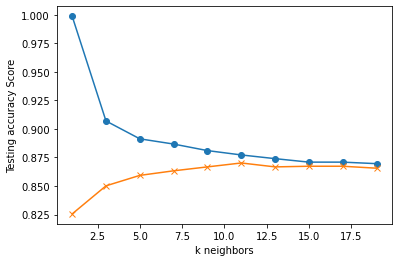

In [154]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

### Grid Search:

In [155]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [156]:
# Use grid search to find best k value
parameters = { 'n_neighbors': range(1, 20, 2) }
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, verbose=3)

In [157]:
# Fit the model
clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.829 total time=   0.1s
[CV 2/5] END .....................n_neighbors=1;, score=0.794 total time=   0.1s
[CV 3/5] END .....................n_neighbors=1;, score=0.818 total time=   0.1s
[CV 4/5] END .....................n_neighbors=1;, score=0.824 total time=   0.1s
[CV 5/5] END .....................n_neighbors=1;, score=0.823 total time=   0.1s
[CV 1/5] END .....................n_neighbors=3;, score=0.863 total time=   0.1s
[CV 2/5] END .....................n_neighbors=3;, score=0.839 total time=   0.1s
[CV 3/5] END .....................n_neighbors=3;, score=0.835 total time=   0.1s
[CV 4/5] END .....................n_neighbors=3;, score=0.844 total time=   0.1s
[CV 5/5] END .....................n_neighbors=3;, score=0.848 total time=   0.1s
[CV 1/5] END .....................n_neighbors=5;, score=0.872 total time=   0.1s
[CV 2/5] END .....................n_neighbors=5;

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20, 2)}, verbose=3)

In [158]:
# Find best parameters & scores
print(clf.best_params_)
print("Best Score: ", clf.best_score_)

{'n_neighbors': 15}
Best Score:  0.8609540893180709


In [159]:
# Make predictions based on test data
predictions = clf.predict(X_test)

In [160]:
# Print out classification report
from sklearn.metrics import classification_report

target_names = ["Candidate", "Confirmed", "False Positive"]
print(classification_report(y_test, predictions, target_names=target_names, zero_division=1))

                precision    recall  f1-score   support

     Candidate       1.00      0.00      0.00       411
     Confirmed       1.00      0.00      0.00       484
False Positive       0.49      1.00      0.66       853

      accuracy                           0.49      1748
     macro avg       0.83      0.33      0.22      1748
  weighted avg       0.75      0.49      0.32      1748



In [161]:
# Find accuracy for classifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=15 Test Acc: 0.867


### Canidate: 0
### Confirmed: 1
### False Positive: 2

In [13]:
# # Loop through to show original class & label
# for label, original_class in zip(encoded_y, y):
#     print('Original Class: ' + str(original_class))
#     print('Encoded Label: ' + str(label))
#     print('-' * 12)

## Train the Model

### Logistic Regression Model:

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [25]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [26]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.8199504100705702
Testing Data Score: 0.8009153318077803


In [27]:
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
4982,FALSE POSITIVE,FALSE POSITIVE
4866,CANDIDATE,CANDIDATE
2934,FALSE POSITIVE,FALSE POSITIVE
5007,FALSE POSITIVE,FALSE POSITIVE
3869,FALSE POSITIVE,FALSE POSITIVE
...,...,...
4006,CANDIDATE,CANDIDATE
6985,CANDIDATE,CANDIDATE
1468,CANDIDATE,CONFIRMED
5138,CANDIDATE,CONFIRMED


### Deep Learning Model:

In [ ]:
# Create model
model = Sequential()
# Input layer
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(100, activation='relu'))

In [ ]:
# Find the shape of the y_train (categorical)
y_train_categorical.shape

In [ ]:
# Output layer
model.add(Dense(y_train_categorical.shape[1], activation='softmax'))

In [ ]:
# Print out the model summary
model.summary()

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fit/Train the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

## Hyperparameter Tuning

In [ ]:
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

In [ ]:
# GridSearchCV: tune model parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

In [ ]:
print(grid.best_params_)

In [ ]:
print(grid.best_score_)

In [ ]:
predictions = grid.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["Canidate", "Confirmed", "False Positive"]))

In [ ]:
# Tune & compare at least 2 different classifiers


## Save the Model

In [ ]:
import joblib
filename = 'models/julia_brunett.sav'
joblib.dump(model, filename)

In [ ]:
# Save the model
model.save("models/exoplanets.h5")